In [1]:
import numpy as np
import pandas as pd
import pyreadr as pyreadr

import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az

In [2]:
res = {}
for i in range(1,5):
    aux = np.load('saved_results_'+str(i)+'.npz')
    if(i == 1):
        res['intercette'] = aux['intercette']
        res['coefficienti'] = aux['coefficienti']
    else:
        res['intercette'] = np.concatenate([res['intercette'], aux['intercette']])
        res['coefficienti'] = np.concatenate([res['coefficienti'], aux['coefficienti']])
        


In [3]:
print(res['intercette'].shape)
print(res['coefficienti'].shape)

(1000,)
(1000, 35)


In [4]:
df = pyreadr.read_r('dataset.Rdata')['data']

In [5]:
df.drop(columns=['WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START'],inplace=True)

In [6]:
lista = df['OCCUPATION_TYPE'].unique().to_list()
for x in ['NaN', 'Drivers', 'Laborers', 'Sales staff']:
    lista.remove(x)

df.replace(to_replace = lista, value='BASE_OCC', inplace=True)

In [7]:
lista = df['ORGANIZATION_TYPE'].unique().to_list()
for x in ['XNA', 'Business Entity Type 3', 'Self-employed']:
    lista.remove(x)

df.replace(to_replace = lista, value='BASE_ORG', inplace=True)

In [8]:
lista_variabili_numeriche = ['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'EXT_SOURCE_2', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_TOTAL']
lista_variabili_categoriche = ['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'NAME_FAMILY_STATUS']
lista_variabili_da_tenere = ['TARGET'] + lista_variabili_categoriche + lista_variabili_numeriche

df = df.loc[:, lista_variabili_da_tenere]


In [9]:
for col_name in lista_variabili_categoriche:
    aux = pd.get_dummies(df[col_name], col_name)
    aux.drop(columns=aux.columns[0], inplace=True)
    df = pd.concat([df, aux], axis=1)
    df.drop(columns=col_name, inplace=True)

In [10]:
for col in df.columns:
    if (len(df[col].unique()) == 2):
        df[col] = df[col].to_numpy().astype(np.int32)
    else:
        df[col] = df[col].to_numpy().astype(np.float32)
        

In [11]:
dizionario_trasformazioni = {}
for col in lista_variabili_numeriche:
    dizionario_trasformazioni[col] = {'media': np.mean(df[col]), 'std': np.std(df[col])}
    df[col] = (df[col] - dizionario_trasformazioni[col]['media'])/(dizionario_trasformazioni[col]['std'])

In [12]:
indici_colonne = df.columns.values[df.columns != 'TARGET'].tolist()

In [13]:
indici_colonne

['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'EXT_SOURCE_2',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_TOTAL',
 'OWN_CAR_AGE_10-15',
 'OWN_CAR_AGE_15-20',
 'OWN_CAR_AGE_20-25',
 'OWN_CAR_AGE_25-30',
 'OWN_CAR_AGE_5-10',
 'OWN_CAR_AGE_>=30',
 'OWN_CAR_AGE_NaN',
 'OCCUPATION_TYPE_Drivers',
 'OCCUPATION_TYPE_Laborers',
 'OCCUPATION_TYPE_NaN',
 'OCCUPATION_TYPE_Sales staff',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Widow']

In [14]:
df_saved_results = pd.DataFrame()
i = 0
for col in indici_colonne:
    df_saved_results[col] = res['coefficienti'][:,i]
    i += 1
    
df_saved_results

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,OWN_CAR_AGE_>=30,OWN_CAR_AGE_NaN,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_NaN,OCCUPATION_TYPE_Sales staff,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow
0,2.154439e-02,-0.008242,1.195634,0.196537,-1.303957,0.009308,-0.149886,0.009577,-0.060030,-0.085892,...,0.248297,0.239878,0.471443,0.334391,0.024036,0.166377,-0.182468,-0.058730,-0.029303,-0.182086
1,-8.321266e-08,-0.008908,1.213982,0.205876,-1.321852,-0.002537,-0.138098,0.026020,-0.042261,-0.105187,...,0.154277,0.217810,0.449621,0.328456,0.066740,0.147988,-0.148191,0.011666,-0.010983,-0.215192
2,1.215230e-02,-0.018462,1.190378,0.205715,-1.299946,0.025882,-0.160537,0.036402,-0.063600,-0.092219,...,0.160158,0.283165,0.477549,0.359112,0.078015,0.138552,-0.138372,-0.011692,-0.037446,-0.235291
3,-1.194315e-02,0.000358,1.096772,0.208057,-1.230369,-0.011116,-0.151392,0.030814,-0.058000,-0.090675,...,0.410814,0.394221,0.449353,0.322127,0.071903,0.120416,-0.139297,-0.003376,0.000000,-0.136909
4,-2.896330e-02,0.013538,1.266951,0.183059,-1.380320,0.003140,-0.165010,0.029621,-0.060282,-0.101303,...,0.037783,0.320909,0.518813,0.311734,0.040058,0.164354,-0.182958,-0.011103,0.000000,-0.097800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.444974e-02,0.004215,1.228557,0.186935,-1.334272,0.011039,-0.186789,0.008071,-0.046888,-0.090768,...,0.379602,0.364774,0.434054,0.290154,0.004653,0.132684,-0.188655,-0.016538,0.000000,-0.108733
996,-6.246277e-03,-0.001284,1.172137,0.208635,-1.295611,0.018111,-0.171208,0.000034,-0.048969,-0.086003,...,0.240364,0.281510,0.380319,0.288257,-0.020535,0.097034,-0.197020,-0.056218,-0.102187,-0.220619
997,-1.271097e-02,-0.005580,1.225331,0.201224,-1.338275,0.007772,-0.158368,0.016897,-0.043081,-0.087549,...,0.365546,0.299968,0.491341,0.316684,0.031040,0.188144,-0.209641,0.000000,-0.020247,-0.129838
998,0.000000e+00,0.015559,1.194279,0.175413,-1.291690,0.002577,-0.159897,0.006853,-0.050244,-0.093413,...,0.212212,0.271171,0.513219,0.341764,0.053099,0.148784,-0.161428,0.035816,-0.021563,-0.143211


In [15]:
df_risultati = pd.DataFrame()

In [16]:
aux = res['intercette']
name = 'intercetta'

df_risultati['name'] = [name]
df_risultati['mean'] = [np.mean(aux)]
df_risultati['std'] = [np.std(aux)]
df_risultati['25%'] = [np.percentile(aux,25)]
df_risultati['75%'] = [np.percentile(aux,75)]
hdi_interval = az.hdi(aux, hdi_prob=0.95)
df_risultati['HDI_95_Left'] = hdi_interval[0]
df_risultati['HDI_95_Right'] = hdi_interval[1]
df_risultati['p_value'] = [min(np.sum(aux < 0), np.sum(aux > 0))/len(aux)]
df_risultati

,name,mean,std,25%,75%,HDI_95_Left,HDI_95_Right,p_value
0,intercetta,-1.804454,0.04446,-1.835175,-1.774885,-1.885457,-1.716815,0.0


In [17]:
for i in range(res['coefficienti'].shape[1]):
    aux = res['coefficienti'][:,i]
    name = indici_colonne[i]
    hdi_interval = az.hdi(aux, hdi_prob=0.95)

    new_row = {
        'name': [name],
        'mean': [np.mean(aux)],
        'std': [np.std(aux)],
        '25%': [np.percentile(aux,25)],
        '75%': [np.percentile(aux,75)],
        'HDI_95_Left': [hdi_interval[0]],
        'HDI_95_Right': [hdi_interval[1]],
        'p_value': [min(np.sum(aux < 0), np.sum(aux > 0))/len(aux)]
    }
    
    df_risultati = pd.concat([df_risultati, pd.DataFrame(data=new_row)])

df_risultati.set_index('name', inplace=True)

In [18]:
df_risultati

,mean,std,25%,75%,HDI_95_Left,HDI_95_Right,p_value
name,,,,,,,
intercetta,-1.804454,0.044460,-1.835175,-1.774885,-1.885457,-1.716815,0.000
CNT_CHILDREN,-0.009586,0.022463,-0.023662,0.000000,-0.064048,0.026477,0.243
AMT_INCOME_TOTAL,0.001270,0.010070,-0.005586,0.008268,-0.017913,0.020471,0.441
AMT_CREDIT,1.216629,0.054506,1.178183,1.253655,1.117952,1.318617,0.000
AMT_ANNUITY,0.186023,0.016293,0.174968,0.196766,0.150502,0.214971,0.000
AMT_GOODS_PRICE,-1.319945,0.055492,-1.356567,-1.283106,-1.419581,-1.210867,0.000
REGION_POPULATION_RELATIVE,0.008956,0.010214,0.002401,0.016191,-0.011462,0.027915,0.188
DAYS_BIRTH,-0.160066,0.011701,-0.167729,-0.152211,-0.183232,-0.138098,0.000
DAYS_EMPLOYED,0.018921,0.014459,0.008770,0.028478,-0.009809,0.044830,0.097


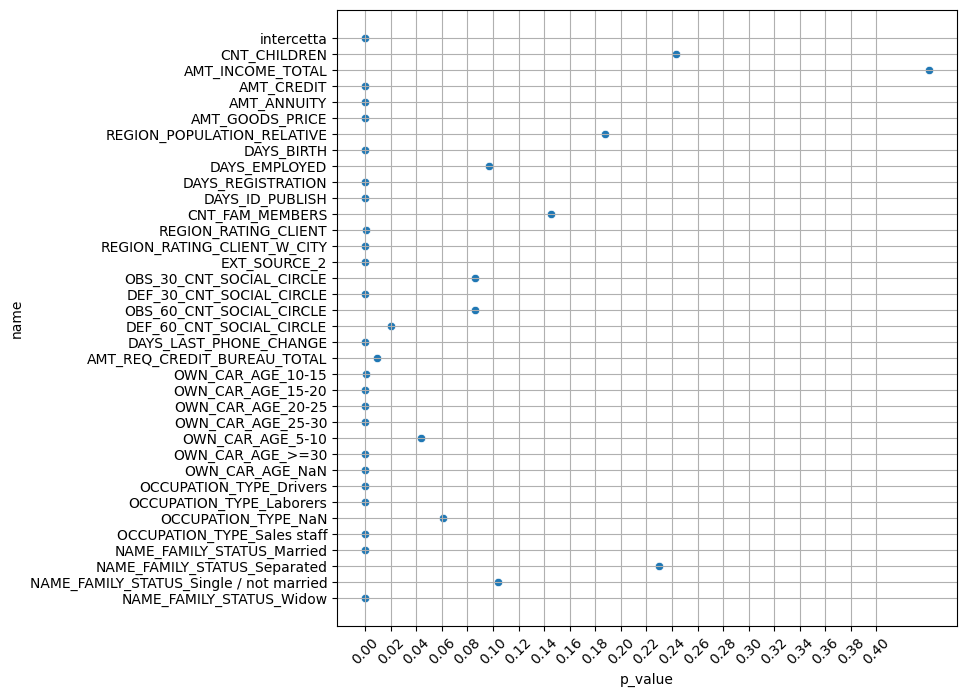

In [19]:
plt.figure(figsize=(8,8))
ax = plt.subplot(1,1,1)
sax = sns.scatterplot(df_risultati, y='name', x='p_value')
ticks = ax.set_xticks(np.linspace(0.0,0.4,21))
ticks = plt.xticks(rotation=45)
plt.grid()

<AxesSubplot: >

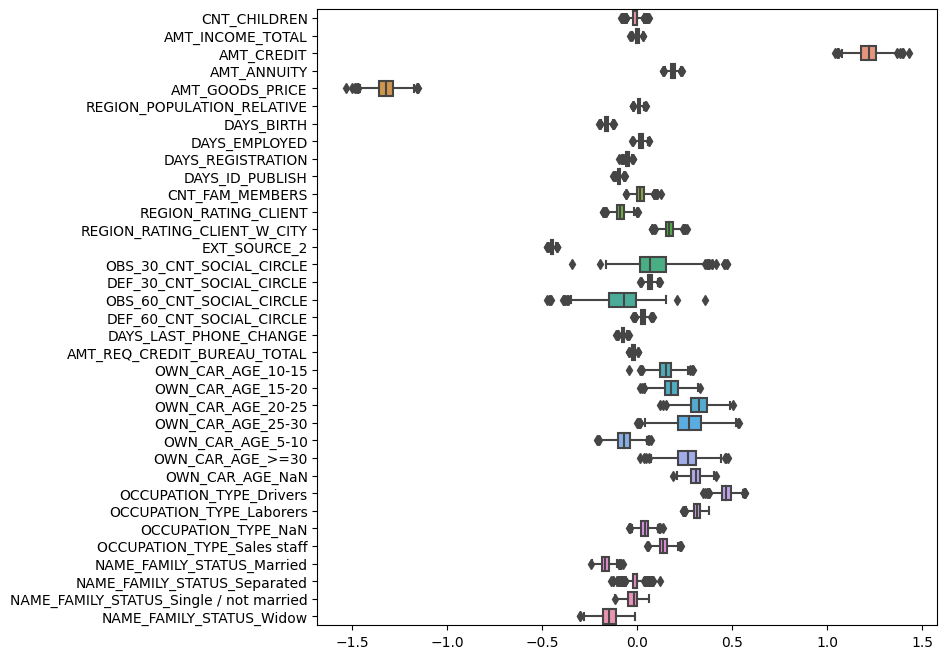

In [20]:
plt.figure(figsize=(8,8))
sns.boxplot(df_saved_results, orient='h')